epsilon:  0
average reward : -28.992
→ → → ← ↑ → → → → → → ↓ 
← ↑ → → ↓ → → → → → ↓ ↓ 
→ → → → → → → → → → → ↓ 
↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ 

epsilon:  0.1
average reward : -64.14299999999999
← → → ↓ ← ↓ ↓ ↑ ↓ ↑ → ↓ 
↑ → → ← ↑ → → ↓ → → → ↓ 
→ → → → → → → → → → → ↓ 
↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ 

epsilon:  0.2
average reward : -115.7834
← → ↑ → → → → → → ↓ ↓ ↓ 
→ → → ↑ → → → → ↓ → → ↓ 
→ → → → → → → → → → → ↓ 
↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ 

epsilon:  0.3
average reward : -184.6004
← → ↓ → → → → → ↓ → ↓ ↓ 
→ → → ↓ → → → → → ↓ → ↓ 
→ → → → → → → → → → → ↓ 
↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ 

epsilon:  0.5
average reward : -431.1346
→ → ↓ → → → ↓ → ↓ → → ↓ 
→ → → → → → → → → → → ↓ 
→ → → → → → → → → → → ↓ 
↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ 



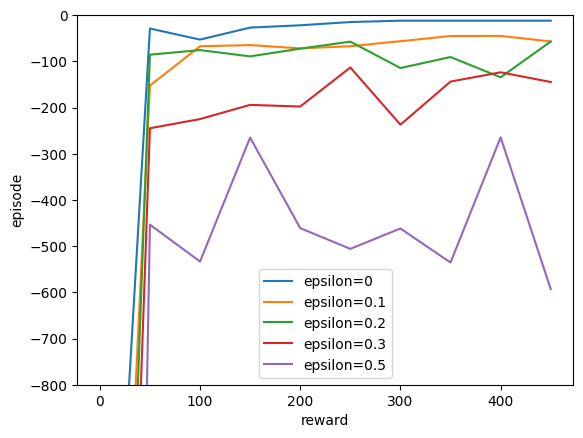

In [11]:
import numpy as np
from collections import defaultdict
from environment import CliffEnvironment
import matplotlib.pyplot as plt


def epsilon_greedy_policy(Q, state, nA, epsilon):
    action = np.argmax(Q[state])
    A = np.ones(nA, dtype=np.float32) * epsilon / nA
    A[action] += 1 - epsilon
    return A


def greedy_policy(Q, state):
    best_action = np.argmax(Q[state])
    return best_action


def print_policy(Q):
    env = CliffEnvironment()
    result = ""
    for i in range(env.height):
        line = ""
        for j in range(env.width):
            action = np.argmax(Q[(j, i)])  # find the action to max Q value
            if action == 0:
                line += "↑ "
            elif action == 1:
                line += "↓ "
            elif action == 2:
                line += "← "
            else:
                line += "→ "
        result = line + "\n" + result
    print(result)


def Qlearning(alpha=0.1, episode_num=500, discount_factor=1.0,epsilon=0.3):
    env = CliffEnvironment()
    Q = defaultdict(lambda: np.zeros(env.nA))
    rewards = []
    for i in range(episode_num):
        env._reset()
        cur_state, done = env.observation()
        sum_reward = 0.0

        while not done:
            prob = epsilon_greedy_policy(Q, cur_state, env.nA,epsilon)
            action = np.random.choice(np.arange(env.nA), p=prob)  # re-select action per round
            next_state, reward, done = env._step(action)  # apply action to find next state
            if done:
                Q[cur_state][action] = Q[cur_state][action] + alpha * (
                        reward + discount_factor * 0.0 - Q[cur_state][action])
                break
            else:
                # use next_action ONLY to calculate Q，BUT the actual next action to perform is  not that
                next_action = greedy_policy(Q, next_state)
                Q[cur_state][action] = Q[cur_state][action] + alpha * (
                        reward + discount_factor * Q[next_state][next_action] - Q[cur_state][action])
                cur_state = next_state
            sum_reward += reward
        rewards.append(sum_reward)
    return Q, rewards


def plot(x, y,labels):
    # np.save('Q_learning_x.npy',x)
    # np.save('Q_learning_y.npy',y)
    size = len(x)
    x = [x[i] for i in range(size) if i % 50 == 0]
    y = [y[i] for i in range(size) if i % 50 == 0]
    plt.plot(x, y,label=labels)
    #plt.xlim(0,200)


candidate_epsilon=[0,0.1,0.2,0.3,0.5]
for epsilon in candidate_epsilon:
    print('epsilon: ',epsilon)
    Q, rewards = Qlearning(episode_num=500,epsilon=epsilon)
    average_rewards = []
    for i in range(10):
        _, rewards = Qlearning(episode_num=500,epsilon=epsilon)
        if len(average_rewards) == 0:
            average_rewards = np.array(rewards)
        else:
            average_rewards = average_rewards + np.array(rewards)

    average_rewards = average_rewards * 1.0 / 10
    #plt.title('average_reward_for_Q_learning')
    plot(range(500), average_rewards,labels='epsilon='+str(epsilon))
    print("average reward :", np.mean(average_rewards))
    #print(average_rewards[-1])
    print_policy(Q)
   # print((rewards))
plt.xlabel('reward')
plt.ylabel('episode')
plt.ylim(-800,0)
plt.legend()
#plt.savefig('Qlearning_epsilon.pdf')
plt.show()



0
← → ↑ ← ↓ → → → → → ↓ ↓ 
↑ ↑ ← → → ← → → ↓ → → ↓ 
→ → → → → → → → → → → ↓ 
↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ 

average reward : -14.827
0.1
→ → → → → → → → → → → ↓ 
↑ ↑ → → ↑ → ↑ ↑ ↑ ↑ → ↓ 
↑ ← ↑ ↑ ← ← → → ← ↑ → ↓ 
↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ 

average reward : -30.128
0.2
→ → → → → → → ↑ → → → ↓ 
↑ ↑ → ↑ → ↑ → → ↑ ↑ → ↓ 
↑ ↑ ← ↑ ↑ ← → ↑ ↑ → → ↓ 
↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ 

average reward : -46.4786
0.3
→ → → → → → → ↓ → → → ↓ 
↑ ↑ → ↑ ↑ → → → → → → ↓ 
↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ → ↓ 
↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ 

average reward : -68.394
0.5
→ → → → → → → ↑ → → → ↓ 
↑ ← ↑ ↑ ↑ ↑ ↑ → → → ↓ ↓ 
↑ ← → ↑ ↑ ↑ → → → ↑ → ↓ 
↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ 

average reward : -153.53730000000002


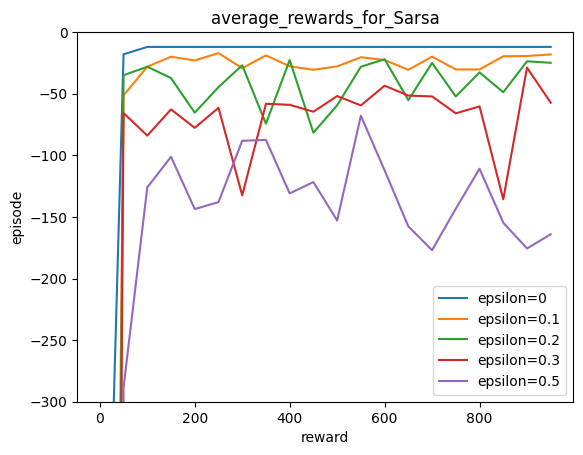

In [10]:

def sarsa(env, episode_nums, discount_factor=1.0, alpha=0.5, epsilon=0.1):
    env = CliffEnvironment()
    Q = defaultdict(lambda: np.zeros(env.nA))
    rewards = []
    # policy = []

    for episode in range(episode_nums):  # episode_nums: 1000

        env._reset()
        state, done = env.observation()
        A = epsilon_greedy_policy(Q, state, env.nA,epsilon)
        probs = A
        action = np.random.choice(np.arange(env.nA), p=probs)  # action probability
        sum_reward = 0.0

        while not done:
            next_state, reward, done = env._step(action)  # exploration

            if done:
                Q[state][action] = Q[state][action] + alpha * (reward + discount_factor * 0.0 - Q[state][action])
                break
            else:
                next_A = epsilon_greedy_policy(Q, next_state, env.nA,epsilon)  # get action probability distribution for next state
                probs = next_A
                next_action = np.random.choice(np.arange(env.nA),p=probs)  # get next action, use [next_state][next_action]  to update Q[state][action]
                Q[state][action] = Q[state][action] + alpha * (
                        reward + discount_factor * Q[next_state][next_action] - Q[state][action])
                state = next_state
                action = next_action
            sum_reward += reward
        rewards.append(sum_reward)

    # plot(range(1,1+ len(policy)),policy)
    return Q, rewards


for epsilon in candidate_epsilon:
    print(epsilon)
    env = CliffEnvironment()
    Q, rewards = sarsa(env, episode_nums=1000,epsilon=epsilon)
    average_rewards = []
    for i in range(10):
        Q, rewards = sarsa(env, episode_nums=1000,epsilon=epsilon)
        if len(average_rewards) == 0:
            average_rewards = np.array(rewards)
        else:
            average_rewards = average_rewards + np.array(rewards)

    average_rewards = average_rewards * 1.0 / 10
    plt.title('average_rewards_for_Sarsa')
    plot(range(1000), average_rewards,labels='epsilon='+str(epsilon))
    print_policy(Q)
    print("average reward :", np.mean(average_rewards))

plt.xlabel('reward')
plt.ylabel('episode')
plt.ylim(-300,0)
plt.legend()
plt.show()